In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

import os

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum05"
try:
    print(os.listdir(path))
except FileNotFoundError:
    print(f"Directory not found: {path}")

df = pd.read_csv(path + "/data/Iris.csv")
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'model', 'reports', 'notebooks']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
print("Shape dataset:", df.shape)
print("\n5 data pertama:")
print(df.head())

print("\nInformasi dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

print("\nDistribusi species:")
print(df['Species'].value_counts())

Shape dataset: (150, 6)

5 data pertama:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), i

In [34]:
print("\nPREPROCESSING DATA")
# Memeriksa missing values
print("Missing values:")
print(df.isnull().sum())

df = df.drop('Id', axis=1)
print("\nDataset setelah menghapus kolom Id:")
print(df.head())

X = df.drop('Species', axis=1)
y = df['Species']

print("\nFitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


PREPROCESSING DATA
Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset setelah menghapus kolom Id:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Fitur (X):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4     

In [35]:
print("\nMEMBAGI DATA TRAINING DAN TESTING")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")
print(f"Distribusi kelas di training:\n{y_train.value_counts()}")
print(f"Distribusi kelas di testing:\n{y_test.value_counts()}")



MEMBAGI DATA TRAINING DAN TESTING
Jumlah data training: 120
Jumlah data testing: 30
Distribusi kelas di training:
Species
Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: count, dtype: int64
Distribusi kelas di testing:
Species
Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: count, dtype: int64


In [36]:
print("\nMEMBUAT MODEL DECISION TREE")

dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=3
)

dt_classifier.fit(X_train, y_train)

print("Model Decision Tree telah berhasil dilatih!")


MEMBUAT MODEL DECISION TREE
Model Decision Tree telah berhasil dilatih!



EVALUASI MODEL
Akurasi pada data training: 0.9833 (98.33%)
Akurasi pada data testing: 0.9667 (96.67%)

Classification Report (Testing):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix (Testing):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


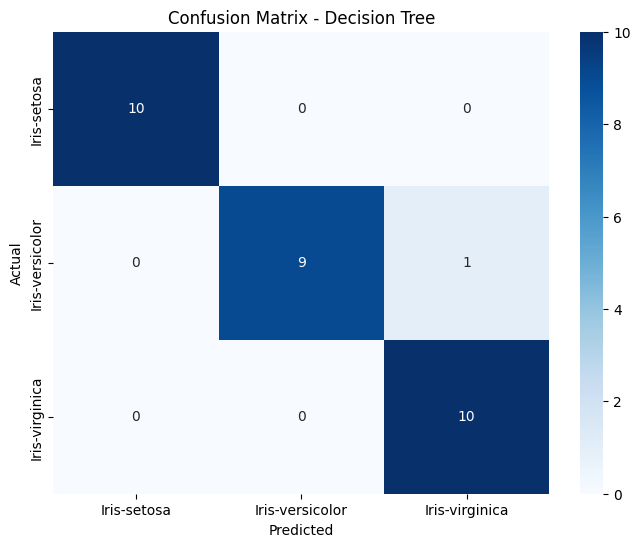

In [37]:
print("\nEVALUASI MODEL")
y_train_pred = dt_classifier.predict(X_train)

y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Akurasi pada data training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi pada data testing: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Testing):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classifier.classes_,
            yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


VISUALISASI DECISION TREE


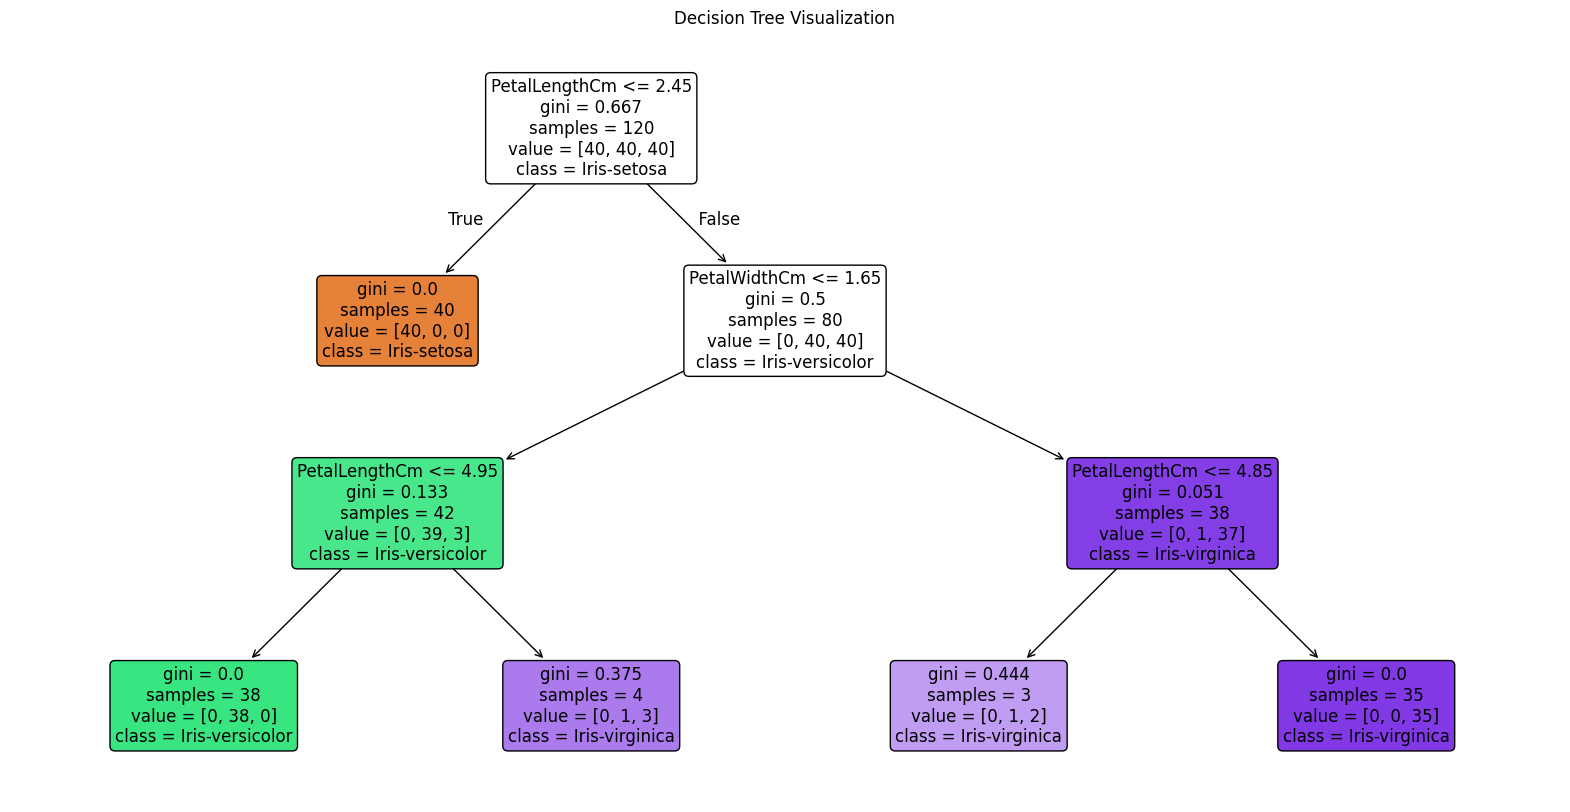

In [38]:
print("\nVISUALISASI DECISION TREE")
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier,
               feature_names=X.columns,
               class_names=dt_classifier.classes_,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()


FEATURE IMPORTANCE
Feature Importance:
         feature  importance
2  PetalLengthCm    0.579077
3   PetalWidthCm    0.420923
1   SepalWidthCm    0.000000
0  SepalLengthCm    0.000000


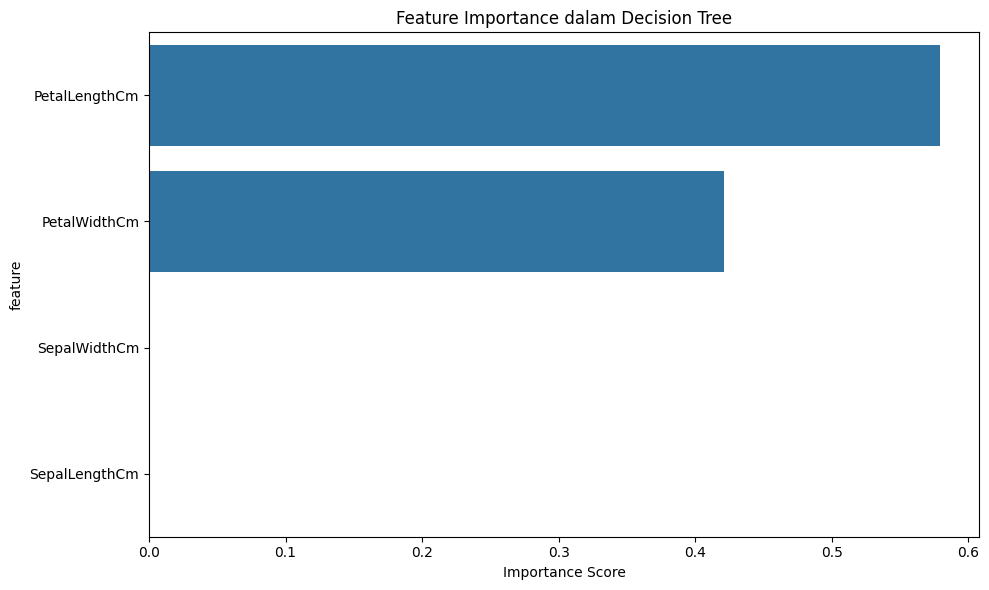

In [39]:
print("\nFEATURE IMPORTANCE")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance dalam Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [40]:
print("\nPREDIKSI PADA DATA TESTING")
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_test_pred
results['Correct'] = results['Actual'] == results['Predicted']

print("Contoh hasil prediksi pada data testing:")
print(results.head(10))

correct_predictions = results['Correct'].sum()
total_predictions = len(results)
print(f"\nHasil prediksi: {correct_predictions} benar dari {total_predictions} data testing")


PREDIKSI PADA DATA TESTING
Contoh hasil prediksi pada data testing:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
38             4.4           3.0            1.3           0.2   
127            6.1           3.0            4.9           1.8   
57             4.9           2.4            3.3           1.0   
93             5.0           2.3            3.3           1.0   
42             4.4           3.2            1.3           0.2   
56             6.3           3.3            4.7           1.6   
22             4.6           3.6            1.0           0.2   
20             5.4           3.4            1.7           0.2   
147            6.5           3.0            5.2           2.0   
84             5.4           3.0            4.5           1.5   

              Actual        Predicted  Correct  
38       Iris-setosa      Iris-setosa     True  
127   Iris-virginica   Iris-virginica     True  
57   Iris-versicolor  Iris-versicolor     True  
93   Iris-versicolo

In [41]:
print("\nCONTOH PREDIKSI DATA BARU")

new_data = np.array([[5.1, 3.5, 1.4, 0.2],   # Iris-setosa
                     [6.5, 3.0, 5.8, 2.2],   # Iris-virginica
                     [5.9, 3.0, 4.2, 1.5]])  # Iris-versicolor

new_df = pd.DataFrame(new_data, columns=X.columns)

new_predictions = dt_classifier.predict(new_df)
probabilities = dt_classifier.predict_proba(new_df)

print("Prediksi untuk data baru:")
for i, (pred, prob) in enumerate(zip(new_predictions, probabilities)):
    print(f"Data {i+1}: Prediksi = {pred}")
    print(f"         Probabilitas: {dict(zip(dt_classifier.classes_, prob))}")
    print(f"         Keyakinan: {max(prob)*100:.2f}%")


CONTOH PREDIKSI DATA BARU
Prediksi untuk data baru:
Data 1: Prediksi = Iris-setosa
         Probabilitas: {'Iris-setosa': np.float64(1.0), 'Iris-versicolor': np.float64(0.0), 'Iris-virginica': np.float64(0.0)}
         Keyakinan: 100.00%
Data 2: Prediksi = Iris-virginica
         Probabilitas: {'Iris-setosa': np.float64(0.0), 'Iris-versicolor': np.float64(0.0), 'Iris-virginica': np.float64(1.0)}
         Keyakinan: 100.00%
Data 3: Prediksi = Iris-versicolor
         Probabilitas: {'Iris-setosa': np.float64(0.0), 'Iris-versicolor': np.float64(1.0), 'Iris-virginica': np.float64(0.0)}
         Keyakinan: 100.00%


In [42]:
print("\nKESIMPULAN")
print(f"Model Decision Tree berhasil dibuat dengan:")
print(f"- Akurasi training: {train_accuracy*100:.2f}%")
print(f"- Akurasi testing: {test_accuracy*100:.2f}%")
print(f"- Fitur paling penting: {feature_importance.iloc[0]['feature']}")
print(f"- Jumlah data training: {len(X_train)}")
print(f"- Jumlah data testing: {len(X_test)}")


KESIMPULAN
Model Decision Tree berhasil dibuat dengan:
- Akurasi training: 98.33%
- Akurasi testing: 96.67%
- Fitur paling penting: PetalLengthCm
- Jumlah data training: 120
- Jumlah data testing: 30
